# Data Mining with R
Import libs:

In [ ]:
library(caret)
library(data.table)
library(dplyr)
library(PerformanceAnalytics)
library(rpart.plot)

## Data Overview
Data Set Characteristics: | Number of Instances: | Attribute Characteristics: |  Number of Attributes: | Associated Tasks:
--- | --- | --- | --- | ---
Multivariate | 1372| Real | 5| Classification

**Dataset information:** Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400 x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

**Attribute information:**
1. variance of Wavelet Transformed image (type: continuous) 
2. skewness of Wavelet Transformed image (type: continuous) 
3. curtosis of Wavelet Transformed image (type: continuous) 
4. entropy of image (type: continuous) 
5. class (type: integer)

**Data source:** https://archive.ics.uci.edu/ml/datasets/banknote+authentication

Load `data_banknote_authentication.txt` file:

In [2]:
url = paste('https://archive.ics.uci.edu/ml/machine-learning-databases/00267/',
            'data_banknote_authentication.txt', sep='')
df = data.frame(fread(url))
names(df) = c('variance', 'skewness', 'curtosis', 'entropy', 'class')

Check size of `df` dataframe:

In [3]:
nrow(df)

[1] 1372

Show the first part of `df` dataframe:

In [4]:
head(df, 5)

variance,skewness,curtosis,entropy,class
3.62160,8.6661,-2.8073,-0.44699,0
4.54590,8.1674,-2.4586,-1.46210,0
3.86600,-2.6383,1.9242,0.10645,0
3.45660,9.5228,-4.0112,-3.59440,0
0.32924,-4.4552,4.5718,-0.98880,0


Show the last part of `df` dataframe:

In [5]:
tail(df, 5)

,variance,skewness,curtosis,entropy,class
1368,0.40614,1.34920,-1.4501,-0.55949,1
1369,-1.38870,-4.87730,6.4774,0.34179,1
1370,-3.75030,-13.45860,17.5932,-2.77710,1
1371,-3.56370,-8.38270,12.3930,-1.28230,1
1372,-2.54190,-0.65804,2.6842,1.19520,1


## Summary Statistics
### Mean

In [6]:
print(noquote(paste0('Mean. Variance of Wavelet Transformed image: ', mean(df$variance))))
print(noquote(paste0('Mean. Skewness of Wavelet Transformed image: ', mean(df$skewness))))
print(noquote(paste0('Mean. Curtosis of Wavelet Transformed image: ', mean(df$curtosis))))
print(noquote(paste0('Mean. Entropy of image: ', mean(df$entropy))))

[1] Mean. Variance of Wavelet Transformed image: 0.433735257069971
[1] Mean. Skewness of Wavelet Transformed image: 1.92235312063936
[1] Mean. Curtosis of Wavelet Transformed image: 1.39762711726676
[1] Mean. Entropy of image: -1.19165652004373


### Median

In [7]:
print(noquote(paste0('Median. Variance of Wavelet Transformed image: ',
                     median(df$variance))))
print(noquote(paste0('Median. Skewness of Wavelet Transformed image: ',
                     median(df$skewness))))
print(noquote(paste0('Median. Curtosis of Wavelet Transformed image: ',
                     median(df$curtosis))))
print(noquote(paste0('Median. Entropy of image: ', median(df$entropy))))

[1] Median. Variance of Wavelet Transformed image: 0.49618
[1] Median. Skewness of Wavelet Transformed image: 2.31965
[1] Median. Curtosis of Wavelet Transformed image: 0.61663
[1] Median. Entropy of image: -0.58665


### All-in-One

In [8]:
print(noquote('Summary:'))
summary(select(df, -class))

[1] Summary:


    variance          skewness          curtosis          entropy       
 Min.   :-7.0421   Min.   :-13.773   Min.   :-5.2861   Min.   :-8.5482  
 1st Qu.:-1.7730   1st Qu.: -1.708   1st Qu.:-1.5750   1st Qu.:-2.4135  
 Median : 0.4962   Median :  2.320   Median : 0.6166   Median :-0.5867  
 Mean   : 0.4337   Mean   :  1.922   Mean   : 1.3976   Mean   :-1.1917  
 3rd Qu.: 2.8215   3rd Qu.:  6.815   3rd Qu.: 3.1793   3rd Qu.: 0.3948  
 Max.   : 6.8248   Max.   : 12.952   Max.   :17.9274   Max.   : 2.4495  

### Correlation

In [9]:
cor(df)

,variance,skewness,curtosis,entropy,class
variance,1.0000000,0.2640255,-0.3808500,0.27681670,-0.72484314
skewness,0.2640255,1.0000000,-0.7868952,-0.52632084,-0.44468776
curtosis,-0.3808500,-0.7868952,1.0000000,0.31884089,0.15588324
entropy,0.2768167,-0.5263208,0.3188409,1.00000000,-0.02342368
class,-0.7248431,-0.4446878,0.1558832,-0.02342368,1.00000000


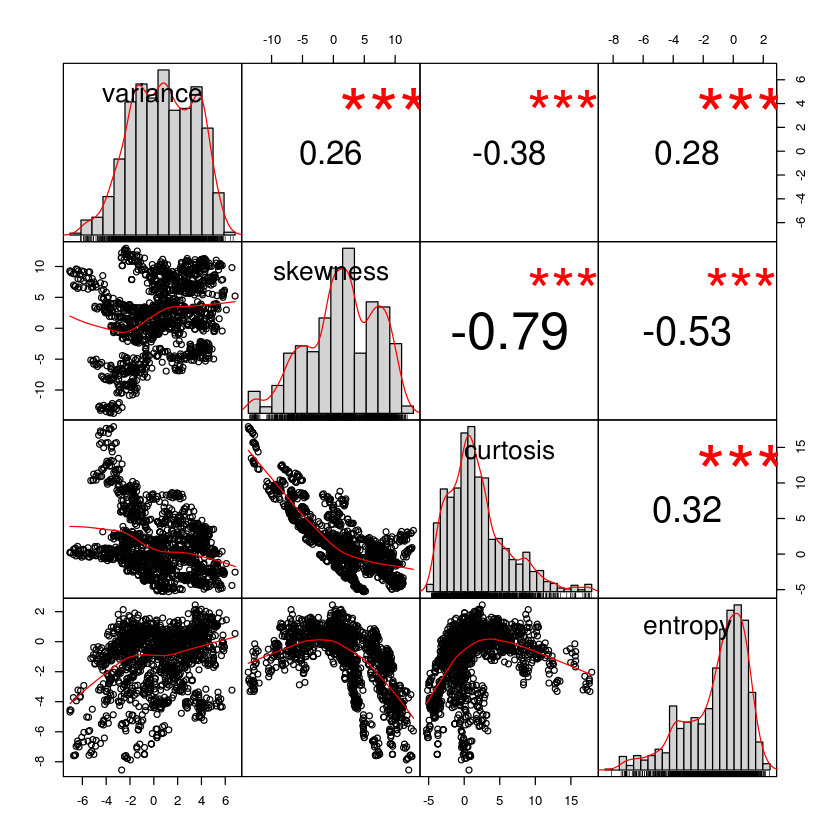

In [10]:
chart.Correlation(select(df, -class), histogram=TRUE)

## Graphics
### Histograms

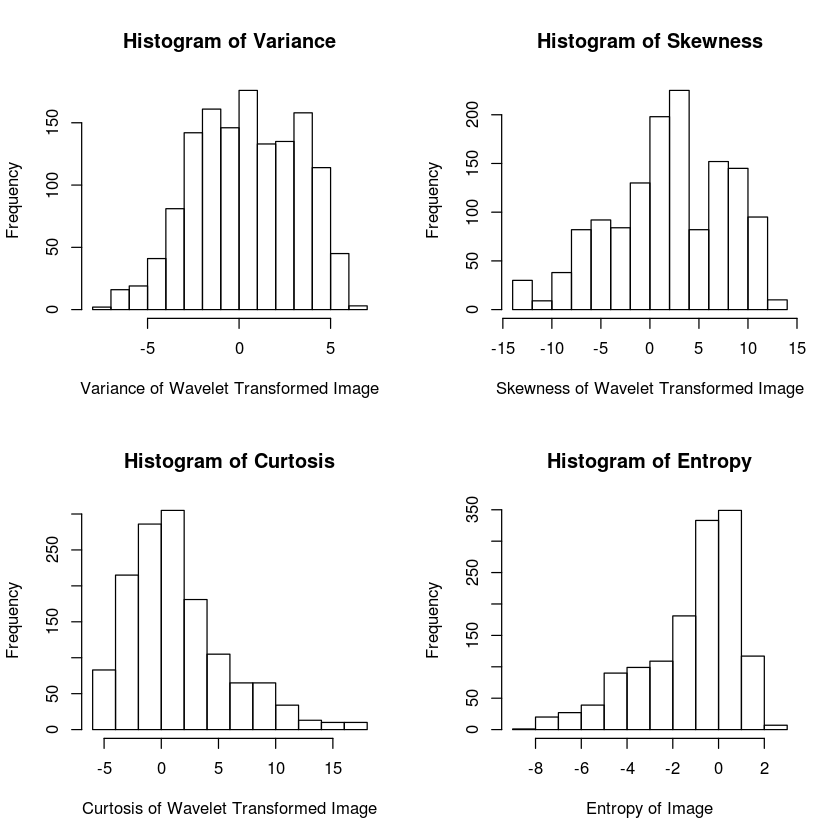

In [11]:
par(mfrow=c(2,2))
hist(df$variance, main='Histogram of Variance',
     xlab='Variance of Wavelet Transformed Image')
hist(df$skewness, main='Histogram of Skewness',
     xlab='Skewness of Wavelet Transformed Image')
hist(df$curtosis, main='Histogram of Curtosis',
     xlab='Curtosis of Wavelet Transformed Image')
hist(df$entropy, main='Histogram of Entropy',
     xlab='Entropy of Image')

### Boxplots

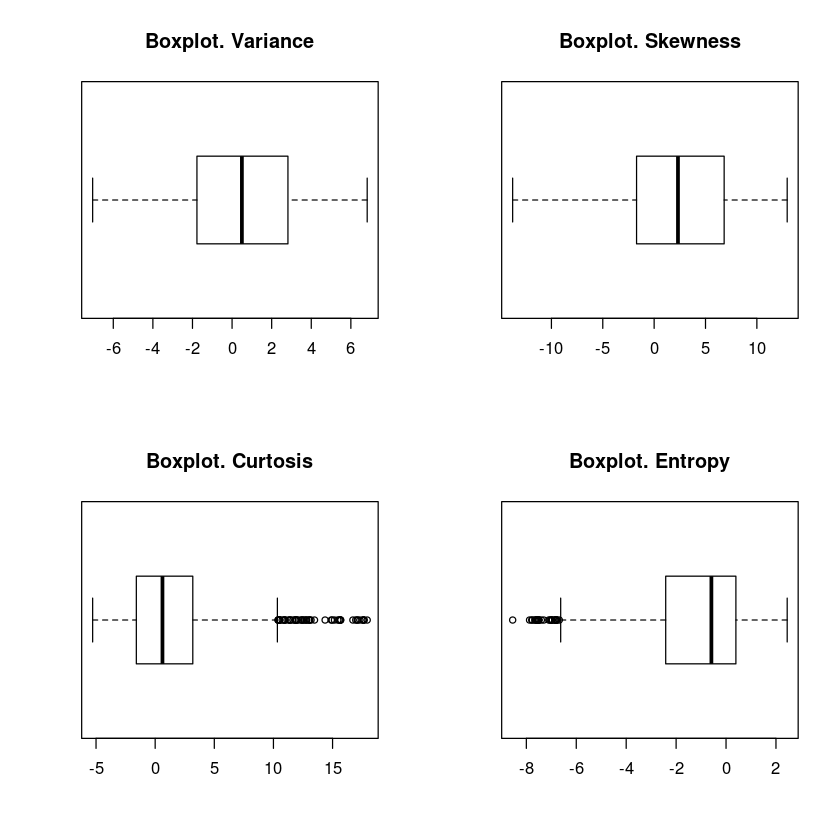

In [12]:
par(mfrow=c(2,2))
boxplot(df$variance, data=df, main='Boxplot. Variance', horizontal=TRUE)
boxplot(df$skewness, data=df, main='Boxplot. Skewness', horizontal=TRUE)
boxplot(df$curtosis, data=df, main='Boxplot. Curtosis', horizontal=TRUE)
boxplot(df$entropy, data=df, main='Boxplot. Entropy', horizontal=TRUE)

## Near Zero Variance Predictors

In [13]:
nearZeroVar(select(df, -class), saveMetrics=TRUE)

,freqRatio,percentUnique,zeroVar,nzv
variance,1.25,97.52187,FALSE,FALSE
skewness,1.20,91.54519,FALSE,FALSE
curtosis,1.00,92.56560,FALSE,FALSE
entropy,1.00,84.25656,FALSE,FALSE


## Linear Combinations

In [14]:
findLinearCombos(select(df, -class))

$linearCombos
list()

$remove
NULL

## Highly Correlated Variables

In [15]:
df$class = as.character(ifelse(df$class=='1', 'Y', 'N'))
df2 = select(df, -class)
cor_matrix = cor(df2)
print(noquote('Highly correlated variables:'))
summary(cor_matrix[upper.tri(cor_matrix)]) # upper triangular part of a matrix

[1] Highly correlated variables:


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.78690 -0.48995 -0.05841 -0.13906  0.27362  0.31884 

In [16]:
high_cor_var = findCorrelation(cor_matrix, cutoff = 0.75) # check var above 0.75
print(noquote(paste0('Highly correlated variables: ', names(df2)[high_cor_var])))

[1] Highly correlated variables: skewness


Delete highly correlated `skewness` column from dataframe:

In [17]:
df2 = select(df2, -skewness)

In [18]:
cor_matrix = cor(df2)
print(noquote('Highly correlated variables:'))
summary(cor_matrix[upper.tri(cor_matrix)]) # upper triangular part of a matrix
df = cbind.data.frame(df2, class = df$class) # add class

[1] Highly correlated variables:


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.38085 -0.05202  0.27682  0.07160  0.29783  0.31884 

## Distribution

In [19]:
print(noquote('Distribution:'))
table(df$class)

[1] Distribution:



  N   Y 
762 610 

In [20]:
class_freq = data.frame(table(df$class))
names(class_freq) = c('class', 'freq')
percent_chart = cbind(class_freq,
                      percent=round((class_freq$freq/sum(class_freq$freq))*100, 1))
percent_chart

class,freq,percent
N,762,55.5
Y,610,44.5


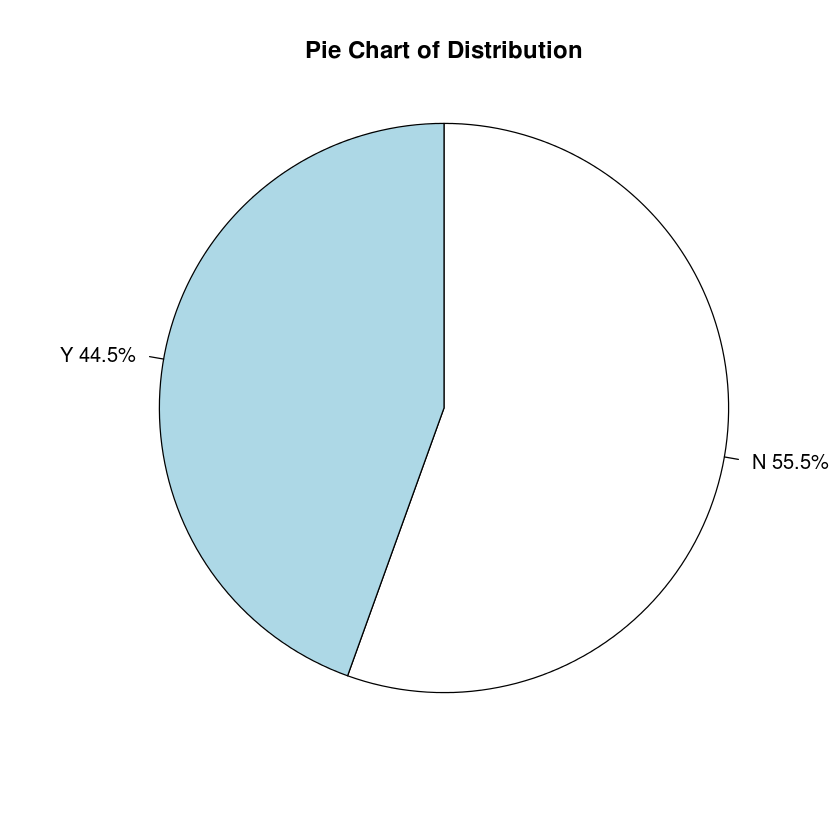

In [21]:
slices = percent_chart$percent
lbls = c('N', 'Y')
pct = round(slices/sum(slices)*100, 1)
lbls = paste(lbls, pct) # add values of pct to labels
lbls = paste(lbls, '%', sep='') # add % char to labels
pie(slices, labels=lbls, radius=1, main='Pie Chart of Distribution',
    clockwise=TRUE)

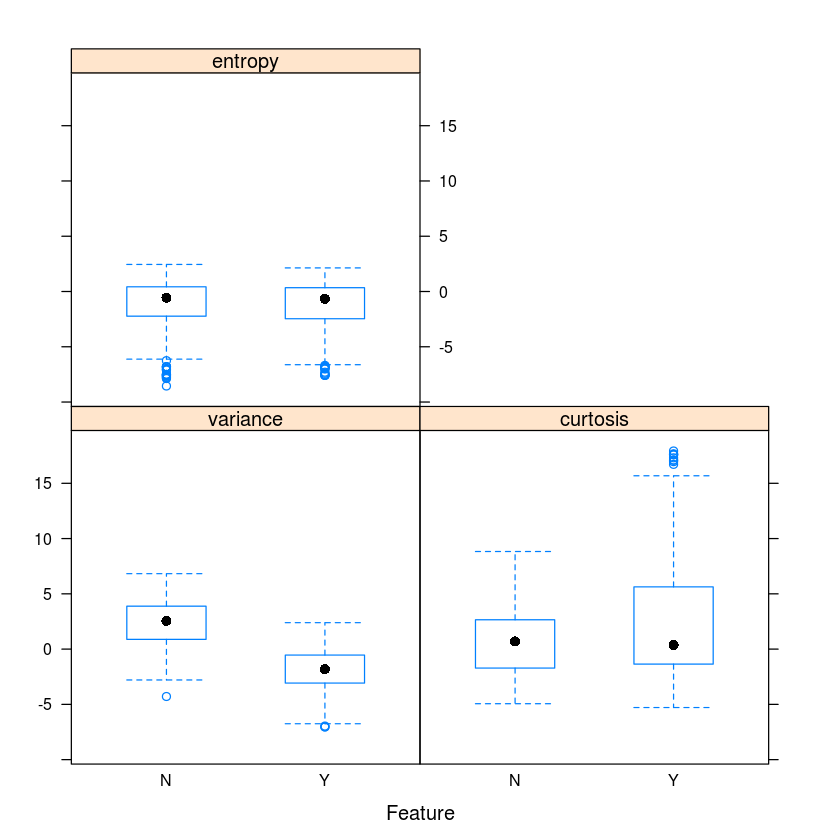

In [22]:
featurePlot(x=select(df, -class), y=df$class, plot='box')

## Decision Tree

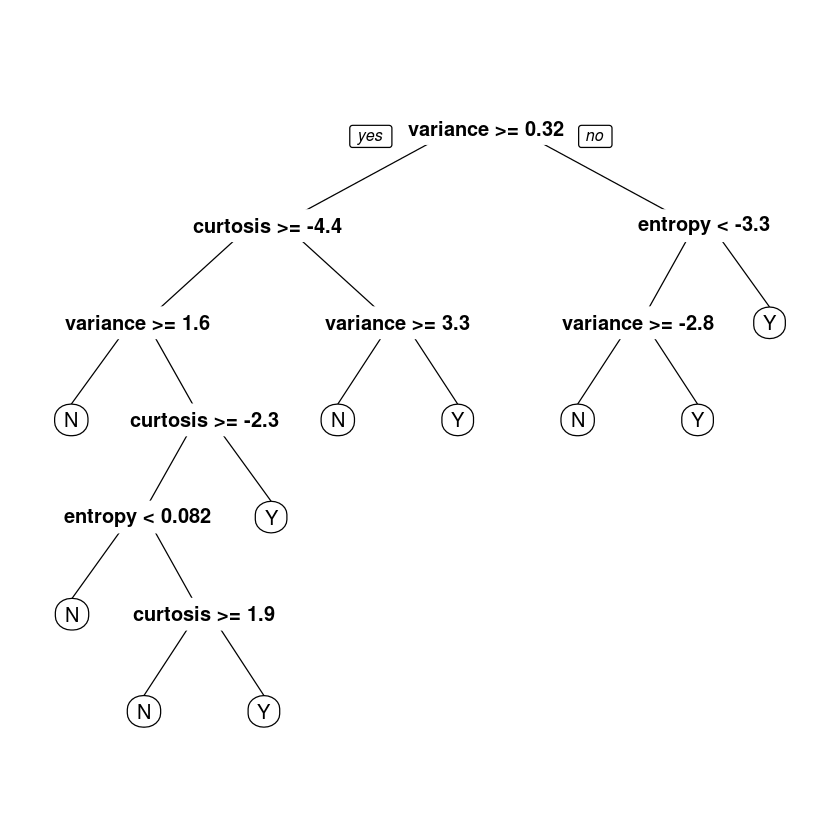

In [23]:
rtree_set = rpart(class ~ ., df)
prp(rtree_set)

## Classification

![ml_map](http://scikit-learn.org/stable/_static/ml_map.png)

Split the data to train and test sets:

In [24]:
train_ind = createDataPartition(df$class, p=0.7, list=FALSE) 
data_train = data.frame(df[train_ind, ])
data_test = data.frame(df[-train_ind, ])
print(noquote('Train:'))
table(data_train$class)
print(noquote('Test:'))
table(data_test$class)

[1] Train:



  N   Y 
534 427 

[1] Test:



  N   Y 
228 183 

Choose validation method for the test of model:

In [25]:
valid_par = trainControl(method='repeatedcv', number=5, repeats=10, p=0.70, preProc='range') 

### SVM

In [26]:
mod_svm = train(class ~ ., data=data_train, trControl=valid_par, method='svmRadial')
mod_svm

Support Vector Machines with Radial Basis Function Kernel 

961 samples
  3 predictors
  2 classes: 'N', 'Y' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 10 times) 
Summary of sample sizes: 768, 768, 769, 769, 770, 769, ... 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.25  0.9744057  0.9483807
  0.50  0.9770093  0.9536186
  1.00  0.9783630  0.9563694

Tuning parameter 'sigma' was held constant at a value of 0.7714744
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.7714744 and C = 1.

### KNN

In [27]:
mod_knn = train(class ~. , data=data_train, trControl=valid_par, method='knn')
mod_knn

k-Nearest Neighbors 

961 samples
  3 predictors
  2 classes: 'N', 'Y' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 10 times) 
Summary of sample sizes: 769, 769, 768, 770, 768, 769, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.9723239  0.9440054
  7  0.9752389  0.9499532
  9  0.9757549  0.9510339

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 9.

Show summary:

In [28]:
print(noquote('Summary:'))
mod_results = resamples(list(SVM=mod_svm, KNN=mod_knn))
summary(mod_results)

[1] Summary:



Call:
summary.resamples(object = mod_results)

Models: SVM, KNN 
Number of resamples: 50 

Accuracy 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
SVM 0.9479167 0.9739583 0.9792206 0.9783630 0.9843750 0.9947917    0
KNN 0.9430052 0.9689119 0.9791667 0.9757549 0.9843545 0.9947917    0

Kappa 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
SVM 0.8947022 0.9475410 0.9581517 0.9563694 0.9684487 0.9894575    0
KNN 0.8852990 0.9372578 0.9578706 0.9510339 0.9683391 0.9894806    0


### SVM vs KNN

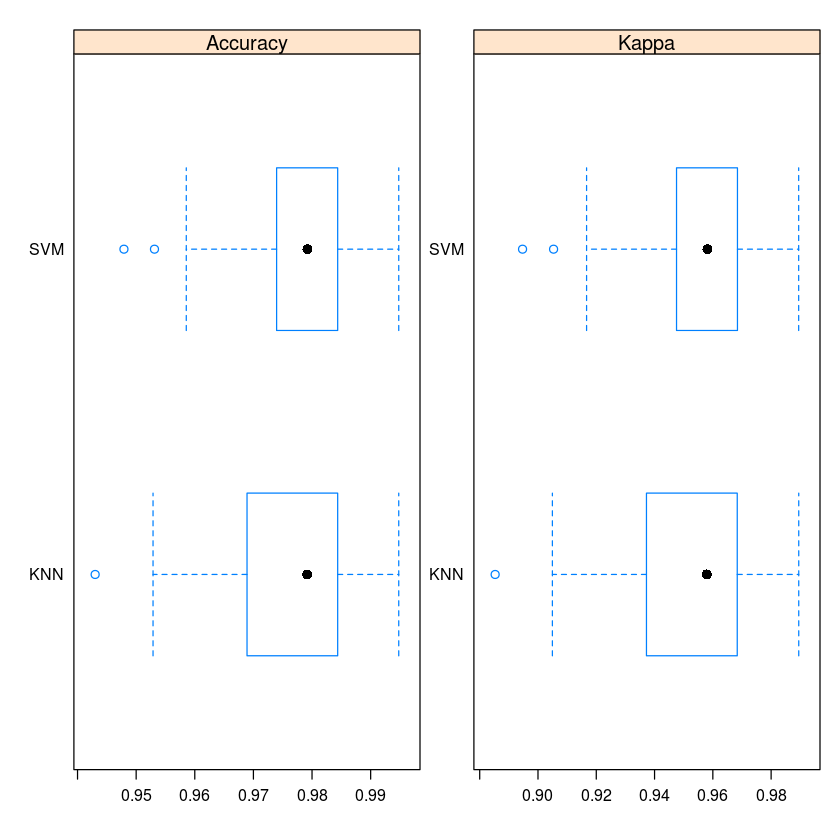

In [29]:
bwplot(mod_results, scales=list(x=list(relation='free'), y=list(relation='free')))

Test models:

In [30]:
test = select(data_test, -class)
test_sum = data_test$class 
mod_predict_svm = predict(mod_svm, test)
print(noquote('SMV:'))
confusionMatrix(mod_predict_svm, test_sum)
mod_predict_knn = predict(mod_knn, test)
print(noquote('KNN:'))
confusionMatrix(mod_predict_knn, test_sum)

[1] SMV:


Confusion Matrix and Statistics

          Reference
Prediction   N   Y
         N 222   1
         Y   6 182
                                          
               Accuracy : 0.983           
                 95% CI : (0.9652, 0.9931)
    No Information Rate : 0.5547          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9656          
 Mcnemar's Test P-Value : 0.1306          
                                          
            Sensitivity : 0.9737          
            Specificity : 0.9945          
         Pos Pred Value : 0.9955          
         Neg Pred Value : 0.9681          
             Prevalence : 0.5547          
         Detection Rate : 0.5401          
   Detection Prevalence : 0.5426          
      Balanced Accuracy : 0.9841          
                                          
       'Positive' Class : N               
                                          

[1] KNN:


Confusion Matrix and Statistics

          Reference
Prediction   N   Y
         N 221   4
         Y   7 179
                                          
               Accuracy : 0.9732          
                 95% CI : (0.9526, 0.9866)
    No Information Rate : 0.5547          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9459          
 Mcnemar's Test P-Value : 0.5465          
                                          
            Sensitivity : 0.9693          
            Specificity : 0.9781          
         Pos Pred Value : 0.9822          
         Neg Pred Value : 0.9624          
             Prevalence : 0.5547          
         Detection Rate : 0.5377          
   Detection Prevalence : 0.5474          
      Balanced Accuracy : 0.9737          
                                          
       'Positive' Class : N               
                                          